# T-SNE Visualization Tool

## 1) Collect trajectories

### a) Create basis trajectories:

In [2]:
import numpy as np
import os
import sys
import pickle
import pandas as pd

from regym.environments import generate_task, EnvType
from regym.rl_algorithms import rockAgent, paperAgent, scissorsAgent, randomAgent

def RPSenv():
    import gym
    import gym_rock_paper_scissors
    return gym.make('RockPaperScissors-v0')

def RPSTask(RPSenv):
    return generate_task('RockPaperScissors-v0', EnvType.MULTIAGENT_SIMULTANEOUS_ACTION)


In [4]:
from tqdm import tqdm
from regym.rl_loops.multiagent_loops import simultaneous_action_rl_loop


def collect_basis_trajectories_for(env, agents, fixed_opponents, nbr_episodes_matchup):
    trajs = {'agent':[],
                'opponent':[],
                'trajectory':[]
                }
    
    progress_bar = tqdm(range(len(fixed_opponents)))
    for e in progress_bar:
        fixed_opponent = fixed_opponents[e]
        for agent in agents:
            trajectories = simulate(env, agent, fixed_opponent, episodes=nbr_episodes_matchup, training=False)
            for t in trajectories:
                trajs['agent'].append( fixed_opponent.name)
                trajs['opponent'].append( agent.name)
                trajs['trajectory'].append( t)
        progress_bar.set_description(f'Collecting trajectories: {agent.name} against {fixed_opponent.name}.')
    return trajs

def simulate(env, agent, fixed_opponent, episodes, training):
    agent_vector = [agent, fixed_opponent]
    trajectories = list()
    mode = 'Training' if training else 'Inference'
    progress_bar = tqdm(range(episodes))
    for e in progress_bar:
        trajectory = simultaneous_action_rl_loop.run_episode(env, agent_vector, training=training)
        trajectories.append(trajectory)
        progress_bar.set_description(f'{mode} {agent.name} against {fixed_opponent.name}')
    return trajectories


In [5]:
trajectories = collect_basis_trajectories_for(RPSenv(), 
                                              [randomAgent],
                                             [rockAgent, paperAgent, scissorsAgent],
                                             nbr_episodes_matchup=1000)

Inference RandomAgent against RockAgent:   8%|▊         | 77/1000 [00:00<00:06, 143.93it/s]


Inference RandomAgent against RockAgent:  14%|█▎        | 137/1000 [00:00<00:04, 195.12it/s]


Inference RandomAgent against RockAgent:  24%|██▍       | 241/1000 [00:00<00:02, 258.55it/s]


Inference RandomAgent against RockAgent:  32%|███▏      | 322/1000 [00:01<00:02, 316.89it/s]


Inference RandomAgent against RockAgent:  39%|███▉      | 389/1000 [00:01<00:02, 235.45it/s]


Inference RandomAgent against RockAgent:  47%|████▋     | 466/1000 [00:01<00:01, 291.82it/s]


Inference RandomAgent against RockAgent:  58%|█████▊    | 576/1000 [00:02<00:01, 290.07it/s]


Inference RandomAgent against RockAgent:  65%|██████▌   | 652/1000 [00:02<00:01, 326.24it/s]


Inference RandomAgent against RockAgent:  73%|███████▎  | 727/1000 [00:02<00:00, 337.59it/s]


Inference RandomAgent against RockAgent:  80%|███████▉  | 796/1000 [00:02<00:00, 283.72it/s]


Inference RandomAgent against RockAgent:  89%|████████▉ | 890/1000 [00:03<00:00, 297.71it/s]


Inference RandomAgent against RockAgent:  98%|█████████▊| 982/1000 [00:03<00:00, 286.26it/s]


Inference RandomAgent against PaperAgent:   7%|▋         | 69/1000 [00:00<00:02, 342.12it/s]


Inference RandomAgent against PaperAgent:  13%|█▎        | 129/1000 [00:00<00:03, 289.64it/s]


Inference RandomAgent against PaperAgent:  24%|██▍       | 238/1000 [00:00<00:02, 330.64it/s]


Inference RandomAgent against PaperAgent:  31%|███       | 309/1000 [00:01<00:02, 330.60it/s]


Inference RandomAgent against PaperAgent:  39%|███▉      | 388/1000 [00:01<00:01, 359.26it/s]


Inference RandomAgent against PaperAgent:  46%|████▋     | 463/1000 [00:01<00:01, 343.67it/s]


Inference RandomAgent against PaperAgent:  54%|█████▎    | 536/1000 [00:01<00:01, 322.10it/s]


Inference RandomAgent against PaperAgent:  63%|██████▎   | 629/1000 [00:02<00:01, 274.65it/s]


Inference RandomAgent against PaperAgent:  72%|███████▏  | 724/1000 [00:02<00:00, 283.24it/s]


Inference RandomAgent against PaperAgent:  80%|████████  | 803/1000 [00:02<00:00, 320.57it/s]


Inference RandomAgent against PaperAgent:  87%|████████▋ | 873/1000 [00:02<00:00, 317.04it/s]


Inference RandomAgent against PaperAgent:  97%|█████████▋| 971/1000 [00:03<00:00, 313.38it/s]


Inference RandomAgent against ScissorsAgent:   4%|▍         | 41/1000 [00:00<00:02, 402.77it/s]


Inference RandomAgent against ScissorsAgent:  14%|█▎        | 137/1000 [00:00<00:02, 344.05it/s]


Inference RandomAgent against ScissorsAgent:  21%|██        | 207/1000 [00:00<00:02, 329.14it/s]


Inference RandomAgent against ScissorsAgent:  28%|██▊       | 280/1000 [00:00<00:02, 322.45it/s]


Inference RandomAgent against ScissorsAgent:  34%|███▎      | 337/1000 [00:01<00:03, 184.50it/s]


Inference RandomAgent against ScissorsAgent:  45%|████▌     | 451/1000 [00:01<00:02, 261.57it/s]


Inference RandomAgent against ScissorsAgent:  52%|█████▏    | 523/1000 [00:01<00:01, 238.72it/s]


Inference RandomAgent against ScissorsAgent:  60%|██████    | 604/1000 [00:02<00:01, 295.81it/s]


Inference RandomAgent against ScissorsAgent:  68%|██████▊   | 679/1000 [00:02<00:00, 330.13it/s]


Inference RandomAgent against ScissorsAgent:  75%|███████▍  | 749/1000 [00:02<00:00, 296.67it/s]


Inference RandomAgent against ScissorsAgent:  81%|████████  | 811/1000 [00:02<00:00, 235.03it/s]


Inference RandomAgent against ScissorsAgent:  93%|█████████▎| 926/1000 [00:03<00:00, 312.43it/s]


Inference RandomAgent against ScissorsAgent: 100%|██████████| 1000/1000 [00:03<00:00, 295.18it/s][A


In [6]:
trajectories.keys()

dict_keys(['agent', 'opponent', 'trajectory'])

In [7]:
nbr_basis_trajectories = len(trajectories['trajectory'])
print(nbr_basis_trajectories)

3000


### b) Collect trajectories from training:

In [34]:
def all_files_in_directory(directory):
    return [os.path.join(directory, f)
            for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

def all_folders_in_directory(directory):
    return [os.path.join(directory, f)
            for f in os.listdir(directory) if not( os.path.isfile(os.path.join(directory, f))) ]

def all_files_in_directory(directory):
    return [os.path.join(directory, f)
            for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f)) ]

def get_agent_name_from_full_path(filename):
    return os.path.splitext(filename)[0].split('/')[-1]

def get_episode_number_from_full_path(filename):
    return os.path.splitext(filename)[0].split('/')[-1]

def collect_trajectories_from(run_dir, with_policies=False):
    menageries_dir = os.path.join(run_dir,'menageries')
    trajs = {'agent':[],
             'opponent':[],
             'trajectory':[],
             'episode':[]
                }
    policies = []
    
    for folder in all_folders_in_directory(menageries_dir):
        agent_name = get_agent_name_from_full_path(folder)
        policies_files = all_files_in_directory(folder)
        
        if with_policies:
            progress_bar = tqdm(range(len(policies_files)))
            for e in progress_bar:
                f = files[e]
                file_name = get_file_name_from_full_path(f)
                policy = AgentHook.unhook(path=f)
                policies.append(policy)
        
        trajectory_folder = os.path.join(folder, 'trajectories')
        trajectory_files = all_files_in_directory(trajectory_folder)
        progress_bar = tqdm(range(len(trajectory_files)))
        for e in progress_bar:
            t = trajectory_files[e]
            print(t)
            episode_number = get_episode_number_from_full_path(t)
            traj = pickle.load(open(t, 'rb'))
            trajs['agent'].append(agent_name)
            trajs['opponent'].append(agent_name)
            trajs['trajectory'].append(traj)
            trajs['episode'].append(episode_number)
    
    return trajs, policies
        

In [35]:
source_dir = "/home/kevin/Development/git/Generalized-RL-Self-Play-Framework/experiment/experiment-Naive-TrajTest-CH1e3/"
run_dir = os.path.join(source_dir, "run-0")
#run-0/menageries/NaiveSP-ppo_h64_mlp/trajectories
trajs, policies = collect_trajectories_from( run_dir, with_policies=False)


FileNotFoundError: [Errno 2] No such file or directory: '/home/kevin/Development/git/Generalized-RL-Self-Play-Framework/experiment/experiment-Naive-TrajTest-CH1e3/run-0/menageries'

In [33]:
len(trajs['episode'])

NameError: name 'trajs' is not defined

### Add those to the current basis trajectories:

## 2) Encode trajectories

In [15]:
type(trajectories['trajectory'][0])

regym.rl_loops.trajectory.Trajectory

In [17]:
import copy
ts = copy.deepcopy(trajectories['trajectory'])
print(f'Nbr traj: {len(ts)} // Steps per traj: {len(ts[0])}')

Nbr traj: 3000 // Steps per traj: 10


In [19]:
a0 = ts[0][0].action
print(a0)
s0 = ts[0][0].observation[0][-1]
print(s0)

oh_a0 = [ ]

[0, 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [20]:
#actions = [ [step[1] for idx, step in enumerate(t) if idx<3]for t in ts]
#actions = [ [step[1] for idx, step in enumerate(t) if idx<10]for t in ts]

actions = [ [step.observation[0][-1] for idx, step in enumerate(t) if idx<10 and idx>0]for t in ts]

In [22]:
actions = np.asarray(actions)
actions.shape

(3000, 9, 10)

In [23]:
x_actions = copy.deepcopy(actions)
y_agents = np.asarray( copy.deepcopy(trajectories['agent']) )
print(x_actions.shape, y_agents.shape)

(3000, 9, 10) (3000,)


In [62]:
import pickle
data_dir = './data'
x_actions_dir = './x_actions'
y_agents_dir = './y_agents'
pickle.dump( trajectories, open(data_dir, 'wb'))
pickle.dump( x_actions, open(x_actions_dir, 'wb'))
pickle.dump( y_agents, open(y_agents_dir, 'wb'))

In [63]:
"""
def encode_trajectory(data):
    traj = data['trajectory']
    actions = np.asarray( [ [step[1] for idx, step in enumerate(t) if idx<10]for t in traj] )
    agents = np.asarray( data['agent'])
    return actions, agents
"""

"\ndef encode_trajectory(data):\n    traj = data['trajectory']\n    actions = np.asarray( [ [step[1] for idx, step in enumerate(t) if idx<10]for t in traj] )\n    agents = np.asarray( data['agent'])\n    return actions, agents\n"

## 3) Create t-SNE

In [25]:
from sklearn.manifold import TSNE

In [26]:
n_dims = 2
shuffle = False
if shuffle:
    p = np.random.permutation(len(x_actions))
    x_actions = x_actions[p]
    y_agents = y_agents[p]

X_sample_flat = np.reshape(x_actions, [x_actions.shape[0], -1])
perplexities = [5, 50, 100,200,300,500]
#embeddings = TSNE(n_components=n_dims, init='pca', random_state=17, verbose=2, perplexity=perplexities[1]).fit_transform(X_sample_flat)
embeddings = []
for perplexity in perplexities:
    embeddings.append( 
        TSNE(n_components=n_dims, 
                  init='pca',
                  #init='random', 
                  random_state=17, 
                  verbose=2, 
                  learning_rate=300,
                  n_iter=1000,
                  perplexity=perplexity
                 ).fit_transform(X_sample_flat)
    )

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.091s...
[t-SNE] Computed neighbors for 3000 samples in 0.526s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 0.348045
[t-SNE] Computed conditional probabilities in 0.030s
[t-SNE] Iteration 50: error = 92.3806915, gradient norm = 0.0433667 (50 iterations in 0.437s)
[t-SNE] Iteration 100: error = 91.9899826, gradient norm = 0.0382476 (50 iterations in 0.367s)
[t-SNE] Iteration 150: error = 91.7867889, gradient norm = 0.0367397 (50 iterations in 0.349s)
[t-SNE] Iteration 200: error = 91.6549759, gradient norm = 0.0355505 (50 iterations in 0.400s)
[t-SNE] Iteration 250: error = 91.5618134, gradient norm = 0.0343554 (50 iterations in 0.393s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.561813
[t-SNE] Iteration 300: erro

[t-SNE] Iteration 300: error = 1.4019432, gradient norm = 0.0008791 (50 iterations in 0.692s)
[t-SNE] Iteration 350: error = 1.3418854, gradient norm = 0.0002801 (50 iterations in 0.660s)
[t-SNE] Iteration 400: error = 1.3187885, gradient norm = 0.0001654 (50 iterations in 0.660s)
[t-SNE] Iteration 450: error = 1.3090010, gradient norm = 0.0001254 (50 iterations in 0.723s)
[t-SNE] Iteration 500: error = 1.3044899, gradient norm = 0.0000627 (50 iterations in 0.791s)
[t-SNE] Iteration 550: error = 1.3017402, gradient norm = 0.0000486 (50 iterations in 0.723s)
[t-SNE] Iteration 600: error = 1.2999942, gradient norm = 0.0000455 (50 iterations in 0.721s)
[t-SNE] Iteration 650: error = 1.2985104, gradient norm = 0.0000410 (50 iterations in 0.783s)
[t-SNE] Iteration 700: error = 1.2974141, gradient norm = 0.0000340 (50 iterations in 0.729s)
[t-SNE] Iteration 750: error = 1.2966874, gradient norm = 0.0000344 (50 iterations in 0.623s)
[t-SNE] Iteration 800: error = 1.2960564, gradient norm = 0.

In [39]:
x_actions.shape

(3000, 9, 10)

In [27]:
embeddings_dir = './embedding'
pickle.dump(embeddings, open(embeddings_dir, "wb"))

## Plot

In [32]:
trajectories['trajectory'][0]._timesteps()

TypeError: 'list' object is not callable

In [28]:
trajectories['episode'] = list(map( lambda ep: int(ep.split('_')[-1]) if ep is not None else ep, trajectories['episode']) )
trajectories['index'] = [idx for idx in range(len(trajectories['episode']))]
for idx, embedding in enumerate(embeddings):
    trajectories[f'emb{idx}'] = [ embedding[i] for i in range(embedding.shape[0]) ]

KeyError: 'episode'

In [69]:
df = pd.DataFrame(trajectories)

In [71]:
training_df = df[ df.episode != None]

In [72]:
df_dir = './dataframe.df'
pickle.dump(df, open(df_dir, 'wb') )

In [73]:
sorted_training_df = training_df.sort_values(by=['episode'])

In [74]:
sorted_training_df

,agent,opponent,trajectory,episode,index,emb0,emb1,emb2,emb3,emb4,emb5
3064,NaiveSP-ppo_h64_mlp,NaiveSP-ppo_h64_mlp,"[([[array([0., 0., 0., 0., 0., 0., 0., 0., 0.,...",0.0,3064,"[25.949419, -41.83666]","[4.226554, 12.93196]","[3.9396143, 8.384045]","[1.7547204, 3.7075005]","[-2.077623, 0.58243436]","[-1.1745813, 0.8512948]"
4064,NaiveSP-ppo_h64_rnn,NaiveSP-ppo_h64_rnn,"[([[array([0., 0., 0., 0., 0., 0., 0., 0., 0.,...",0.0,4064,"[-23.39387, -61.71334]","[-34.090565, -35.03223]","[-19.819174, -16.09785]","[-8.926834, -8.954058]","[8.324167, 4.6229014]","[7.226527, -0.5116055]"
4470,NaiveSP-ppo_h64_rnn,NaiveSP-ppo_h64_rnn,"[([[array([0., 0., 0., 0., 0., 0., 0., 0., 0.,...",1.0,4470,"[85.795654, 30.750134]","[64.87437, -6.1602306]","[19.036625, 8.753494]","[15.441875, -1.2007278]","[-2.827505, -10.569981]","[-0.012013482, -4.9546075]"
3470,NaiveSP-ppo_h64_mlp,NaiveSP-ppo_h64_mlp,"[([[array([0., 0., 0., 0., 0., 0., 0., 0., 0.,...",1.0,3470,"[-2.681036, 0.8490469]","[-2.8693016, -2.2698152]","[-6.0768147, -0.94597566]","[-3.9677296, -0.5621301]","[1.6442432, 2.9138134]","[2.5003483, 1.1828759]"
4129,NaiveSP-ppo_h64_rnn,NaiveSP-ppo_h64_rnn,"[([[array([0., 0., 0., 0., 0., 0., 0., 0., 0.,...",2.0,4129,"[5.1285853, -32.386345]","[2.7204456, -22.085062]","[1.7234629, -9.251489]","[-0.05198459, -3.734486]","[3.5353692, -1.1290045]","[1.7497882, -1.9563882]"
3129,NaiveSP-ppo_h64_mlp,NaiveSP-ppo_h64_mlp,"[([[array([0., 0., 0., 0., 0., 0., 0., 0., 0.,...",2.0,3129,"[26.315453, 72.07347]","[42.29916, 6.144471]","[27.979918, 5.378714]","[9.606375, -6.6279116]","[2.4490836, -7.2400875]","[-1.6184323, -6.006136]"
3308,NaiveSP-ppo_h64_mlp,NaiveSP-ppo_h64_mlp,"[([[array([0., 0., 0., 0., 0., 0., 0., 0., 0.,...",3.0,3308,"[30.609478, 36.3359]","[9.71262, 42.215202]","[4.852324, 23.127327]","[2.004378, 10.189012]","[-8.028892, 1.5400854]","[-3.8281648, 3.3123364]"
4308,NaiveSP-ppo_h64_rnn,NaiveSP-ppo_h64_rnn,"[([[array([0., 0., 0., 0., 0., 0., 0., 0., 0.,...",3.0,4308,"[94.530624, -4.447279]","[29.19215, 10.150706]","[25.353598, 9.166062]","[9.5606985, 2.7022135]","[-0.69739807, -10.67049]","[-0.8791364, -3.9136605]"
3549,NaiveSP-ppo_h64_mlp,NaiveSP-ppo_h64_mlp,"[([[array([0., 0., 0., 0., 0., 0., 0., 0., 0.,...",4.0,3549,"[-6.9839797, -76.049324]","[-0.5470685, -45.30569]","[-3.3254943, -25.238798]","[-0.7927189, -10.022906]","[7.9624643, -0.99961555]","[4.6112137, -3.749789]"
4549,NaiveSP-ppo_h64_rnn,NaiveSP-ppo_h64_rnn,"[([[array([0., 0., 0., 0., 0., 0., 0., 0., 0.,...",4.0,4549,"[32.9621, 70.52967]","[9.287033, 27.671177]","[3.5618596, 14.857024]","[1.4896775, 6.712058]","[-3.8620746, 1.4891447]","[-1.9792906, 2.0881495]"


['ScissorsAgent', 'RockAgent', 'PaperAgent', 'NaiveSP-ppo_h64_rnn', 'NaiveSP-ppo_h64_mlp']


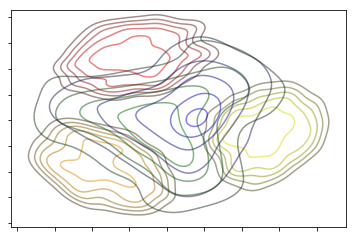

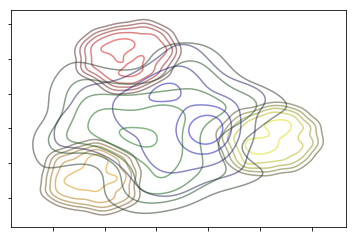

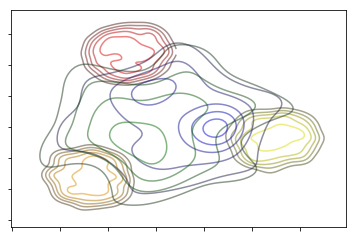

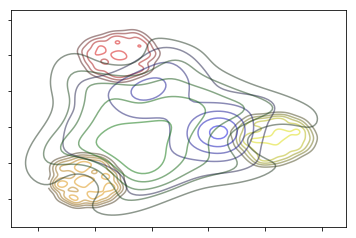

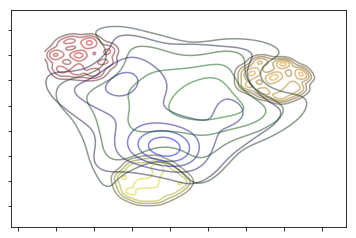

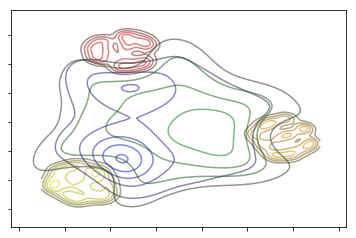

In [87]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.ticker import NullFormatter

num_classes = len(np.unique(y_agents))
labels = np.unique(y_agents)
y_sample = copy.deepcopy(y_agents)

# plot the 2D data points
labels.sort()
labels = list(reversed(labels))
print(labels)

for idx, perplexity in enumerate(perplexities):
    plot_dir = f'./plot-t-sne_per={perplexity}'

    fig = plt.figure()
    ax = fig.add_subplot(111)
    #colors = cm.Spectral(np.linspace(0, 1, num_classes))
    
    #s = np.linspace(2, 3, 10)
    #cmap = sns.cubehelix_palette(start=s[5], light=1, as_cmap=True)
    #colors = sns.cubehelix_palette(start=s[5], light=1, as_cmap=False)
    colors = ["red","yellow","orange", "blue", "green"]    
    
    xx = embeddings[idx][:, 0]
    yy = embeddings[idx][:, 1]
    
    for idx, label in enumerate(labels):
        xl = xx[y_sample==label]
        yl = yy[y_sample==label]
        #ax.scatter(xl, yl, color=colors[idx], label=label, s=10)
        sns.kdeplot(xl, yl, color=colors[idx], n_levels=5, shade=False, cut=1, ax=ax, alpha=0.5, cbar=False)


    #ax.xaxis.set_major_formatter(NullFormatter())
    #ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('off')
    plt.axis('tight')
    #plt.legend(loc='best', scatterpoints=1, fontsize=10)
    plt.savefig(plot_dir+'-multi.pdf', format='pdf', dpi=1000, transparent=True)
    plt.savefig(plot_dir+'-multi.png', format='png', dpi=1000, transparent=True)
    plt.show()
    plt.close(fig)


['ScissorsAgent', 'RockAgent', 'PaperAgent', 'NaiveSP-ppo_h64_rnn', 'NaiveSP-ppo_h64_mlp']
['NaiveSP-ppo_h64_mlp', 'NaiveSP-ppo_h64_rnn']
./plot-t-sne_NaiveSP-ppo_h64_mlp_per=5


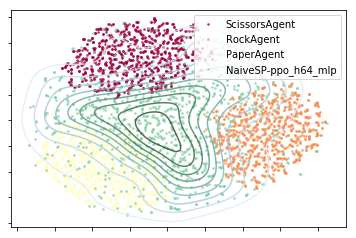

./plot-t-sne_NaiveSP-ppo_h64_mlp_per=5
./plot-t-sne_NaiveSP-ppo_h64_rnn_per=5


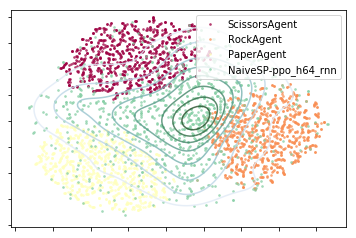

./plot-t-sne_NaiveSP-ppo_h64_rnn_per=5
./plot-t-sne_NaiveSP-ppo_h64_mlp_per=50


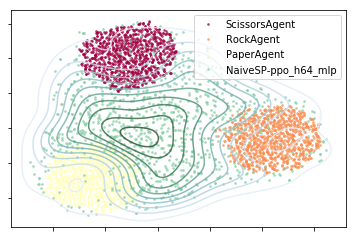

./plot-t-sne_NaiveSP-ppo_h64_mlp_per=50
./plot-t-sne_NaiveSP-ppo_h64_rnn_per=50


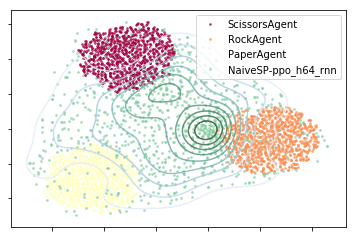

./plot-t-sne_NaiveSP-ppo_h64_rnn_per=50
./plot-t-sne_NaiveSP-ppo_h64_mlp_per=100


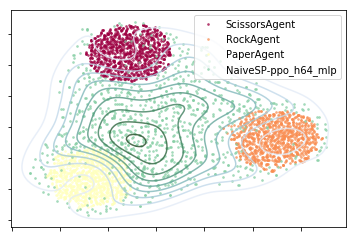

./plot-t-sne_NaiveSP-ppo_h64_mlp_per=100
./plot-t-sne_NaiveSP-ppo_h64_rnn_per=100


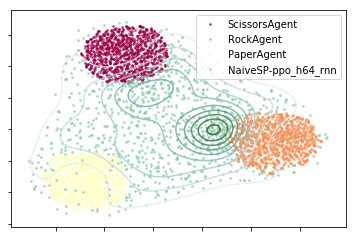

./plot-t-sne_NaiveSP-ppo_h64_rnn_per=100
./plot-t-sne_NaiveSP-ppo_h64_mlp_per=200


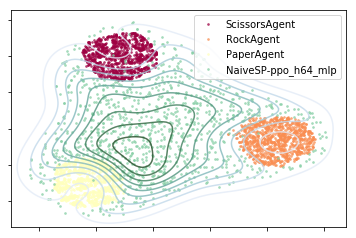

./plot-t-sne_NaiveSP-ppo_h64_mlp_per=200
./plot-t-sne_NaiveSP-ppo_h64_rnn_per=200


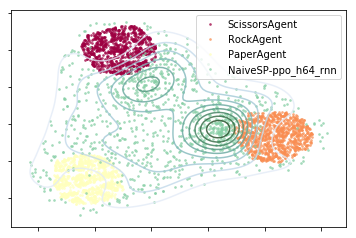

./plot-t-sne_NaiveSP-ppo_h64_rnn_per=200
./plot-t-sne_NaiveSP-ppo_h64_mlp_per=300


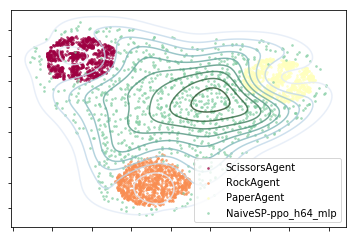

./plot-t-sne_NaiveSP-ppo_h64_mlp_per=300
./plot-t-sne_NaiveSP-ppo_h64_rnn_per=300


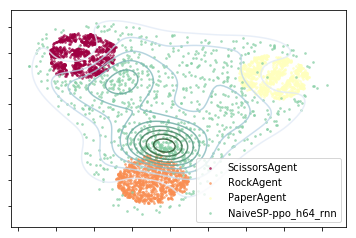

./plot-t-sne_NaiveSP-ppo_h64_rnn_per=300
./plot-t-sne_NaiveSP-ppo_h64_mlp_per=500


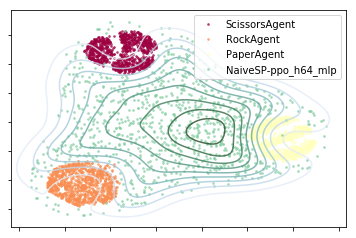

./plot-t-sne_NaiveSP-ppo_h64_mlp_per=500
./plot-t-sne_NaiveSP-ppo_h64_rnn_per=500


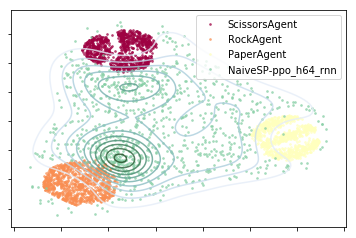

./plot-t-sne_NaiveSP-ppo_h64_rnn_per=500


In [89]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.ticker import NullFormatter
import seaborn as sns

num_classes = len(np.unique(y_agents))
labels = np.unique(y_agents)
y_sample = copy.deepcopy(y_agents)

# plot the 2D data points
labels.sort()
labels = list(reversed(labels))
print(labels)
always_on_labels = [labels[0], labels[1], labels[2]]
#agent_labels = ['NaiveSP-ppo_h64_rnn']
agent_labels = list( set(labels) - set(always_on_labels) )
per_agent_labels_list = [ (agent_label, always_on_labels+[agent_label]) for agent_label in agent_labels]
print(agent_labels)

for idx, perplexity in enumerate(perplexities):
    for idx_label, pa_labels in enumerate(per_agent_labels_list):
        agent_label = pa_labels[0]
        pa_labels_list = pa_labels[1]
        plot_dir = f'./plot-t-sne_{agent_label}_per={perplexity}'

        xx = embeddings[idx][:, 0]
        yy = embeddings[idx][:, 1]
        
        # Create a cubehelix colormap to use with kdeplot
        s = np.linspace(0, 3, 10)[5]
        cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        colors = cm.Spectral(np.linspace(0, 1, num_classes))

        # Draw the background:
        xl = xx[y_sample==agent_label]
        yl = yy[y_sample==agent_label]
        sns.kdeplot(xl, yl, cmap=cmap, shade=False, cut=1, ax=ax, alpha=0.8)

        for idx_label, label in enumerate(pa_labels_list):
            xl = xx[y_sample==label]
            yl = yy[y_sample==label]
            ax.scatter(xl, yl, color=colors[idx_label], label=label, s=3, alpha=0.6)

        #ax.xaxis.set_major_formatter(NullFormatter())
        #ax.yaxis.set_major_formatter(NullFormatter())
        ax.axis('off')
        plt.axis('tight')
        plt.legend(loc='best', scatterpoints=1, fontsize=10)
        plt.savefig(plot_dir+'.eps', format='eps', dpi=1000, transparent=True)
        plt.savefig(plot_dir+'.png', format='png', dpi=1000, transparent=True)
        print(plot_dir)
        plt.show()
        plt.close(fig)
        
        
        # SHADE ON :
        fig = plt.figure()
        ax = fig.add_subplot(111)
        colors = cm.Spectral(np.linspace(0, 1, num_classes))

        # Draw the background:
        xl = xx[y_sample==agent_label]
        yl = yy[y_sample==agent_label]
        sns.kdeplot(xl, yl, cmap=cmap, shade=True, cut=1, ax=ax, alpha=0.5, cbar=True)

        for idx_label, label in enumerate(pa_labels_list):
            xl = xx[y_sample==label]
            yl = yy[y_sample==label]
            ax.scatter(xl, yl, color=colors[idx_label], label=label, s=3, alpha=0.8)

        #ax.xaxis.set_major_formatter(NullFormatter())
        #ax.yaxis.set_major_formatter(NullFormatter())
        ax.axis('off')
        plt.axis('tight')
        plt.legend(loc='best', scatterpoints=1, fontsize=10)
        plt.savefig(plot_dir+'_shaded.eps', format='eps', dpi=1000, transparent=True)
        plt.savefig(plot_dir+'_shaded.png', format='png', dpi=1000, transparent=True)
        print(plot_dir)
        #plt.show()
        plt.close(fig)


## Plot the average evolution of the menagerie through time:

In [242]:
import numpy as np
import matplotlib.pyplot as plt


def find_centroid(points):
    '''
    Finds centroid from set of points
    :param points: np.array of points
    '''
    #length = points.shape[0]
    #sum_x = np.sum(points[:, 0])
    #sum_y = np.sum(points[:, 1])
    #return np.array([sum_x/length, sum_y/length])
    
    #return np.mean(points, axis=0)
    return np.median(points, axis=0)

def divide_points(points, divisions):
    '''
    Divides :param: points into sub np.arrays
    :param points: np.array of points
    :param divisions: int, number of sub np.arrays we wish to divide the original :param: points
    '''
    return np.array_split(points, divisions)


def link_points(points, ax, colour_map, alpha):
    '''
    Plots :param: points as points linked by lines on :param: ax Axes.
    The colour of the points and the lines is a 'smooth' colour transition from
    both colour extremes of the :param: colour_map
    '''
    number_of_points = points.shape[0]
    colours = [colour_map(1.*i/(number_of_points-1)) for i in range(number_of_points-1)]
    point_pairs = zip(points, points[1:]) # Creates a pairs of points (p_0, p_1), (p_1, p_2)...
    for point_pair, colour in zip(point_pairs, colours):
        numpy_point_pair = np.array(point_pair)
        ax.plot(numpy_point_pair[:, 0], numpy_point_pair[:, 1], '-o', color=colour, alpha=alpha)


shape='full'
head_starts_at_zero=True
arrow_h_offset = 0.1  # data coordinates, empirically determined
max_arrow_width=0.06125
max_arrow_length = 1 - 1.2 * arrow_h_offset
max_head_width = 4.5 * max_arrow_width
max_head_length = 5 * max_arrow_width
arrow_params = {'length_includes_head': True, 'shape': shape,
                'head_starts_at_zero': head_starts_at_zero}

def draw_arrow(ax, point_a, point_b, alpha, color):
    # set the length of the arrow
    length = max_arrow_length
    width = max_arrow_width
    head_width = max_head_width
    head_length = max_head_length
    
    point_a = np.reshape( point_a, (-1))
    point_b = np.reshape( point_b, (-1))
    delta = point_b-point_a
    dx, dy = delta[0], delta[1]
    x_a, y_a = point_a[0], point_a[1] 
    ax.arrow(x_a, y_a, dx, dy,
              fc=color, ec=color, alpha=alpha, width=width,
              head_width=head_width, head_length=head_length,
              **arrow_params
             )
    
def point_at_points(points, ax, colour_map, alpha):
    '''
    Plots :param: points as points linked by lines on :param: ax Axes.
    The colour of the points and the lines is a 'smooth' colour transition from
    both colour extremes of the :param: colour_map
    '''
    number_of_points = points.shape[0]
    colours = [colour_map(1.*i/(number_of_points-1)) for i in range(number_of_points-1)]
    point_pairs = zip(points, points[1:]) # Creates a pairs of points (p_0, p_1), (p_1, p_2)...
    for idx, (point_pair, colour) in enumerate(zip(point_pairs, colours)):
        numpy_point_pair = np.array(point_pair)
        if idx==0: ax.plot(numpy_point_pair[0, 0], numpy_point_pair[0, 1], '-o', color=colour, alpha=alpha)
        draw_arrow(ax, numpy_point_pair[0, :], numpy_point_pair[1, :], alpha=alpha, color=colour)

def plot_trajectory_evolution_in_embedded_space(points, divisions, ax, colour_map, alpha):
    divided_points = divide_points(points, divisions=divisions)
    centroids = np.array([find_centroid(sub_points) for sub_points in divided_points])
    link_points(centroids, ax, colour_map, alpha)

def plot_trajectory_evolution_in_embedded_space_with_arrows(points, divisions, ax, colour_map, alpha):
    divided_points = divide_points(points, divisions=divisions)
    centroids = np.array([find_centroid(sub_points) for sub_points in divided_points])
    point_at_points(centroids, ax, colour_map, alpha)

In [118]:
agent_sorted_training_df = sorted_training_df[ sorted_training_df.agent == agent_label]
points = list(agent_sorted_training_df[f'emb{idx}'].values)
points = [ list(p) for p in points]
print(type(points) )
print(type(points[0]))
points = np.asarray(points)
print(points.shape)


<class 'list'>
<class 'list'>
(1000, 2)


['ScissorsAgent', 'RockAgent', 'PaperAgent', 'NaiveSP-ppo_h64_rnn', 'NaiveSP-ppo_h64_mlp']
['NaiveSP-ppo_h64_mlp', 'NaiveSP-ppo_h64_rnn']
./plot-t-sne_NaiveSP-ppo_h64_mlp_per=5_evolution_through_time


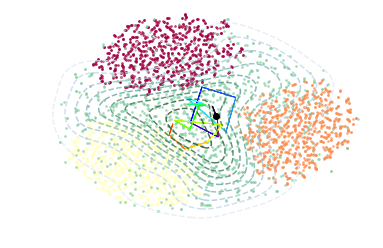

./plot-t-sne_NaiveSP-ppo_h64_rnn_per=5_evolution_through_time


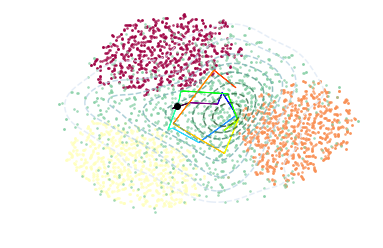

./plot-t-sne_NaiveSP-ppo_h64_mlp_per=50_evolution_through_time


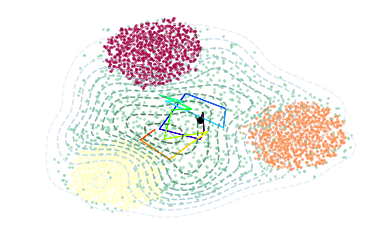

./plot-t-sne_NaiveSP-ppo_h64_rnn_per=50_evolution_through_time


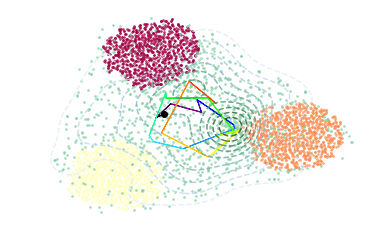

./plot-t-sne_NaiveSP-ppo_h64_mlp_per=100_evolution_through_time


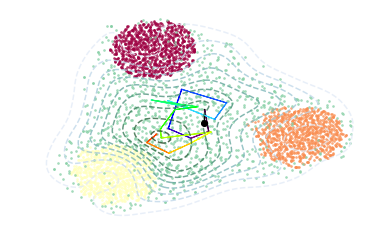

./plot-t-sne_NaiveSP-ppo_h64_rnn_per=100_evolution_through_time


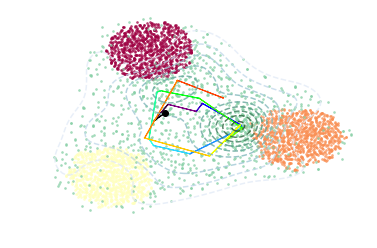

./plot-t-sne_NaiveSP-ppo_h64_mlp_per=200_evolution_through_time


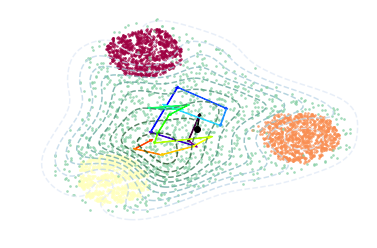

./plot-t-sne_NaiveSP-ppo_h64_rnn_per=200_evolution_through_time


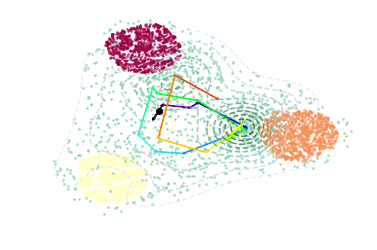

./plot-t-sne_NaiveSP-ppo_h64_mlp_per=300_evolution_through_time


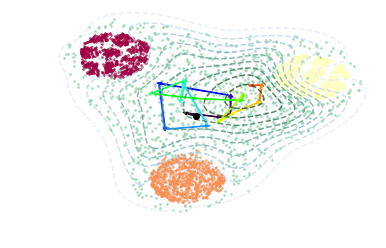

./plot-t-sne_NaiveSP-ppo_h64_rnn_per=300_evolution_through_time


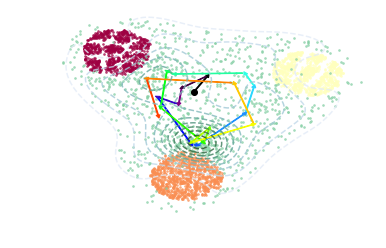

./plot-t-sne_NaiveSP-ppo_h64_mlp_per=500_evolution_through_time


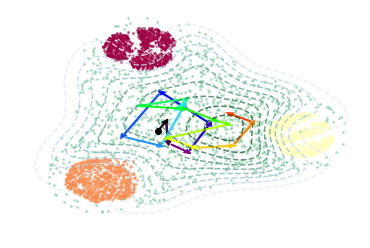

./plot-t-sne_NaiveSP-ppo_h64_rnn_per=500_evolution_through_time


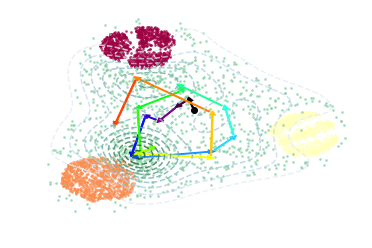

In [243]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.cm import cm
from matplotlib.ticker import NullFormatter
import seaborn as sns

num_classes = len(np.unique(y_agents))
labels = np.unique(y_agents)
y_sample = copy.deepcopy(y_agents)

# plot the 2D data points
labels.sort()
labels = list(reversed(labels))
print(labels)
always_on_labels = [labels[0], labels[1], labels[2]]
#agent_labels = ['NaiveSP-ppo_h64_rnn']
agent_labels = list( set(labels) - set(always_on_labels) )
per_agent_labels_list = [ (agent_label, always_on_labels+[agent_label]) for agent_label in agent_labels]
print(agent_labels)

# Rainbow colour map:
cdict = {'red': ((0.0, 0.0, 0.0),
                 (0.1, 0.5, 0.5),
                 (0.2, 0.0, 0.0),
                 (0.4, 0.2, 0.2),
                 (0.6, 0.0, 0.0),
                 (0.8, 1.0, 1.0),
                 (1.0, 1.0, 1.0)),
        'green':((0.0, 0.0, 0.0),
                 (0.1, 0.0, 0.0),
                 (0.2, 0.0, 0.0),
                 (0.4, 1.0, 1.0),
                 (0.6, 1.0, 1.0),
                 (0.8, 1.0, 1.0),
                 (1.0, 0.0, 0.0)),cid
        'blue': ((0.0, 0.0, 0.0),
                 (0.1, 0.5, 0.5),
                 (0.2, 1.0, 1.0),
                 (0.4, 1.0, 1.0),
                 (0.6, 0.0, 0.0),
                 (0.8, 0.0, 0.0),
                 (1.0, 0.0, 0.0))}

colour_map = matplotlib.colors.LinearSegmentedColormap('rainbow_colormap',cdict,256)

for idx, perplexity in enumerate(perplexities[:]):
    for idx_label, pa_labels in enumerate(per_agent_labels_list):
        agent_label = pa_labels[0]
        pa_labels_list = pa_labels[1]
        plot_dir = f'./plot-t-sne_{agent_label}_per={perplexity}_evolution_through_time'

        xx = embeddings[idx][:, 0]
        yy = embeddings[idx][:, 1]
        
        # Create a cubehelix colormap to use with kdeplot
        s = np.linspace(0, 3, 10)[5]
        cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)
        #colour_map = plt.get_cmap('winter')

        fig = plt.figure()
        ax = fig.add_subplot(111)
        colors = cm.Spectral(np.linspace(0, 1, num_classes))

        # Draw the background:
        xl = xx[y_sample==agent_label]
        yl = yy[y_sample==agent_label]
        sns.kdeplot(xl, yl, cmap=cmap, shade=False, cut=1, ax=ax, alpha=0.8, linestyles='dashed')

        for idx_label, label in enumerate(pa_labels_list):
            xl = xx[y_sample==label]
            yl = yy[y_sample==label]
            ax.scatter(xl, yl, color=colors[idx_label], label=label, s=3, alpha=0.6)
        
        agent_sorted_training_df = sorted_training_df[ sorted_training_df.agent == agent_label]
        points = list(agent_sorted_training_df[f'emb{idx}'].values)
        points = [ list(p) for p in points]
        points = np.asarray(points)
        #plot_trajectory_evolution_in_embedded_space(points, divisions=20, ax=ax, colour_map=colour_map, alpha=0.5)
        plot_trajectory_evolution_in_embedded_space_with_arrows(points, divisions=20, ax=ax, colour_map=colour_map, alpha=1.0)
        
        
        #ax.xaxis.set_major_formatter(NullFormatter())
        #ax.yaxis.set_major_formatter(NullFormatter())
        ax.axis('off')
        
        plt.axis('tight')
        #plt.legend(loc='best', scatterpoints=1, fontsize=10)
        plt.savefig(plot_dir+'.eps', format='eps', dpi=1000, transparent=True)
        plt.savefig(plot_dir+'.png', format='png', dpi=1000, transparent=False)
        print(plot_dir)
        plt.show()
        plt.close(fig)
        
        """
        # SHADE ON :
        fig = plt.figure()
        ax = fig.add_subplot(111)
        colors = cm.Spectral(np.linspace(0, 1, num_classes))

        # Draw the background:
        xl = xx[y_sample==agent_label]
        yl = yy[y_sample==agent_label]
        sns.kdeplot(xl, yl, cmap=cmap, shade=True, cut=1, ax=ax, alpha=0.5, cbar=True)

        for idx_label, label in enumerate(pa_labels_list):
            xl = xx[y_sample==label]
            yl = yy[y_sample==label]
            ax.scatter(xl, yl, color=colors[idx_label], label=label, s=3, alpha=0.8)
        
        plot_trajectory_evolution_in_embedded_space(points, divisions=20, ax=ax, colour_map=colour_map)

        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        plt.axis('tight')
        plt.legend(loc='best', scatterpoints=1, fontsize=10)
        plt.savefig(plot_dir+'_shaded.pdf', format='pdf', dpi=1000, transparent=True)
        plt.savefig(plot_dir+'_shaded.png', format='png', dpi=1000, transparent=True)
        print(plot_dir)
        #plt.show()
        plt.close(fig)
        """
        